In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe1 = pd.read_csv(r'F:\HDD storage (E)\Data Science Preparation\Projects\Rishabh Mishra Project\Data\Python_Diwali_Sales_Analysis\Diwali Sales Data.csv',encoding = 'latin1')

In [3]:
# remove empty columns
dataframe1.drop(['Status','unnamed1'],axis = 1,inplace = True)

In [4]:
# to remove null values
dataframe1.dropna(inplace=True)

In [5]:
# to change the datatype
dataframe1['Amount'] = dataframe1['Amount'].astype('int')

In [6]:
# to check data type of column
dataframe1["Amount"].dtypes

dtype('int64')

In [7]:
# to rename column
dataframe1.rename(columns={'Marital_Status':'Shadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [8]:
# to describe the data
dataframe1.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [9]:
# to describe for specific columns
dataframe1[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


Exploratory Data Analysis

In [10]:
# to see column names 
dataframe1.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

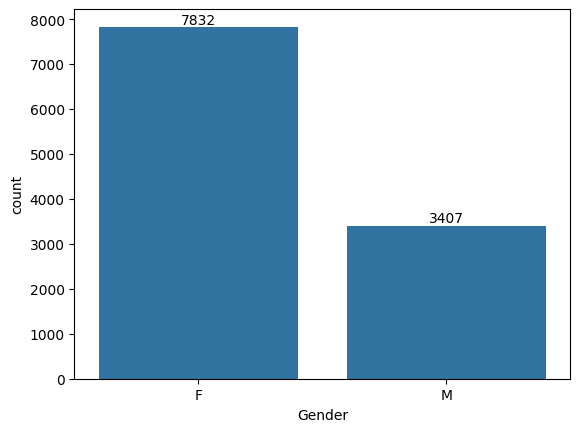

In [11]:
# to know which gender made how many purchases
ax = sns.countplot(x = 'Gender',data=dataframe1)
for bars in ax.containers:
    ax.bar_label(bars)

In [12]:
dataframe1.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

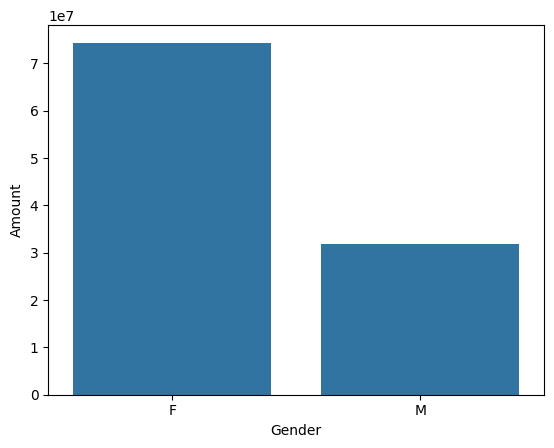

In [13]:
sales_gen = dataframe1.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x = 'Gender',y = 'Amount',data=sales_gen)

In [14]:
# from above graphs we can see that most of the buyers are females and the purchase power of females is greater than that of males

In [15]:
#Age

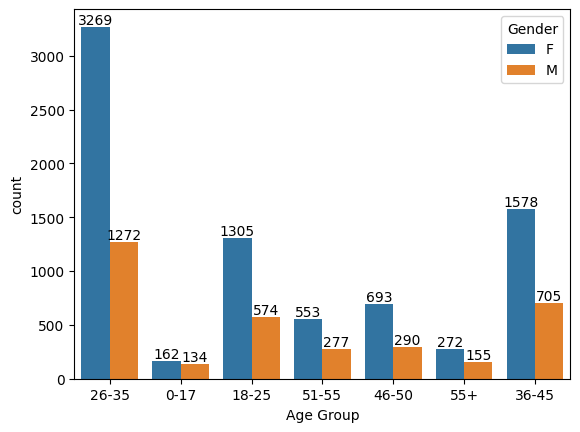

In [16]:
ax = sns.countplot(data=dataframe1,x='Age Group',hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

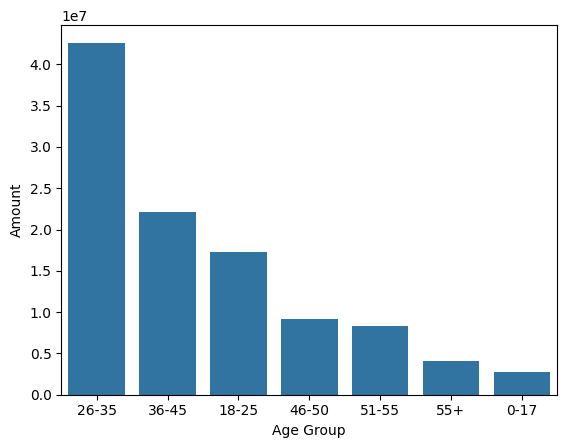

In [17]:
sales_age = dataframe1.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y = 'Amount',data=sales_age)

In [18]:
# from above graphs, we can se that most of the buyers are of age group between 26-35 years, female

<Axes: xlabel='State', ylabel='Amount'>

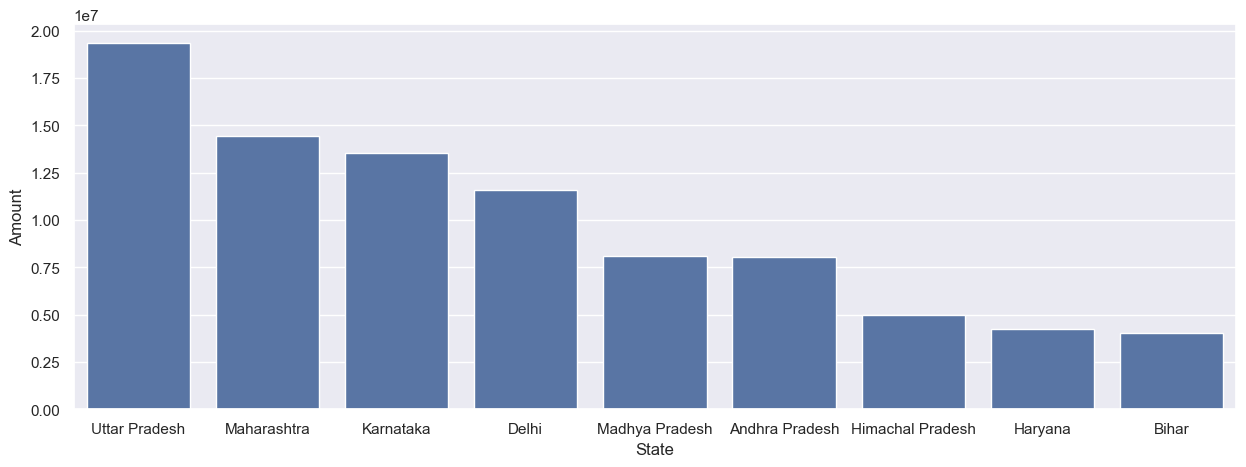

In [19]:
sales_state = dataframe1.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(9)
sns.set(rc={'figure.figsize': (15, 5)})
sns.barplot(data=sales_state, x='State', y='Amount')

<Axes: xlabel='State', ylabel='Orders'>

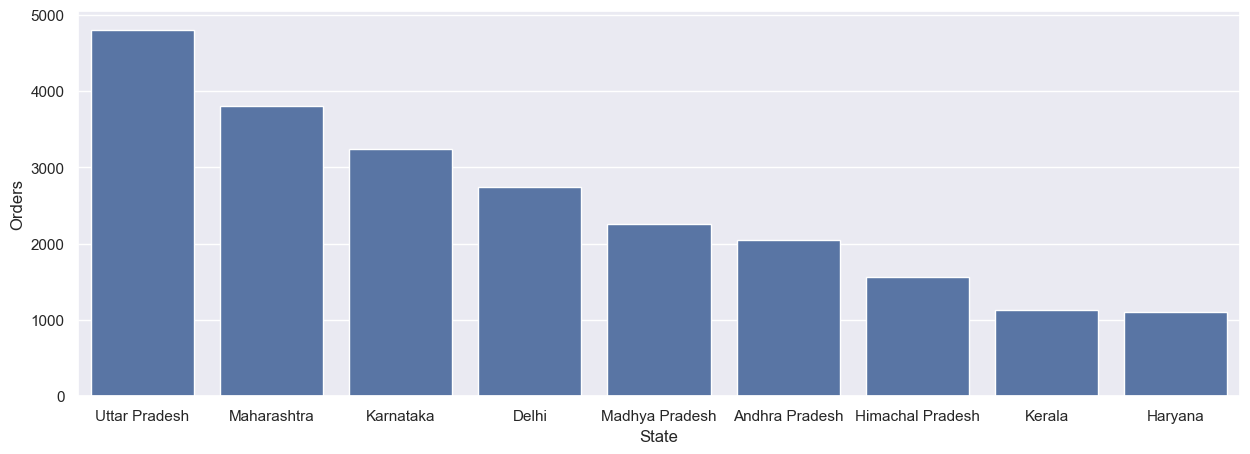

In [20]:
sales_state = dataframe1.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(9)
sns.set(rc={'figure.figsize': (15, 5)})
sns.barplot(data=sales_state, x='State', y='Orders')

In [21]:
# from above graph we can see that unexpectely most of the orders are from uttar pradesh, maharashtra, and karnataka but total sales/amount is from up, karnataka and maharashtra 

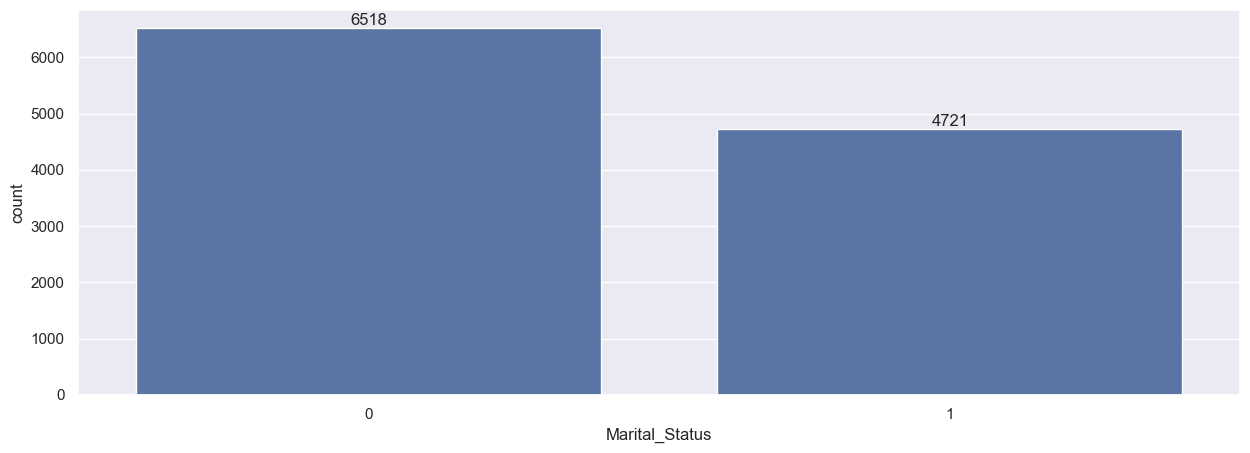

In [22]:
ax = sns.countplot(data=dataframe1,x='Marital_Status')
sns.set(rc={'figure.figsize':(1,5)})
for bars in ax.containers:
    ax.bar_label(bars)

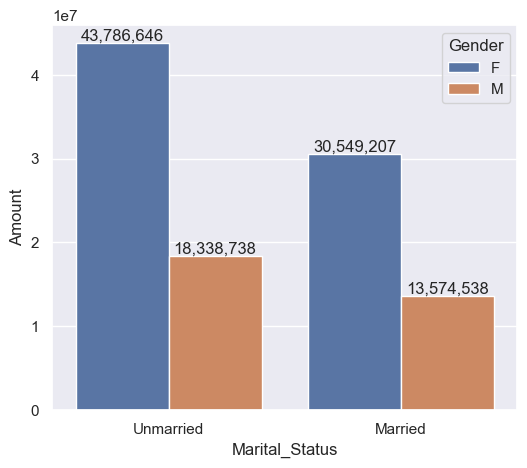

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map 0 → Unmarried, 1 → Married
dataframe1['Marital_Status'] = dataframe1['Marital_Status'].replace({0: 'Unmarried', 1: 'Married'})

# Group and plot
sales_state = dataframe1.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize': (6, 5)})
ax = sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender')

# Add comma-formatted labels above bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='{:,.0f}')


In [24]:
#From above graph we can see that most of the buyers are married females and they have high purchase power

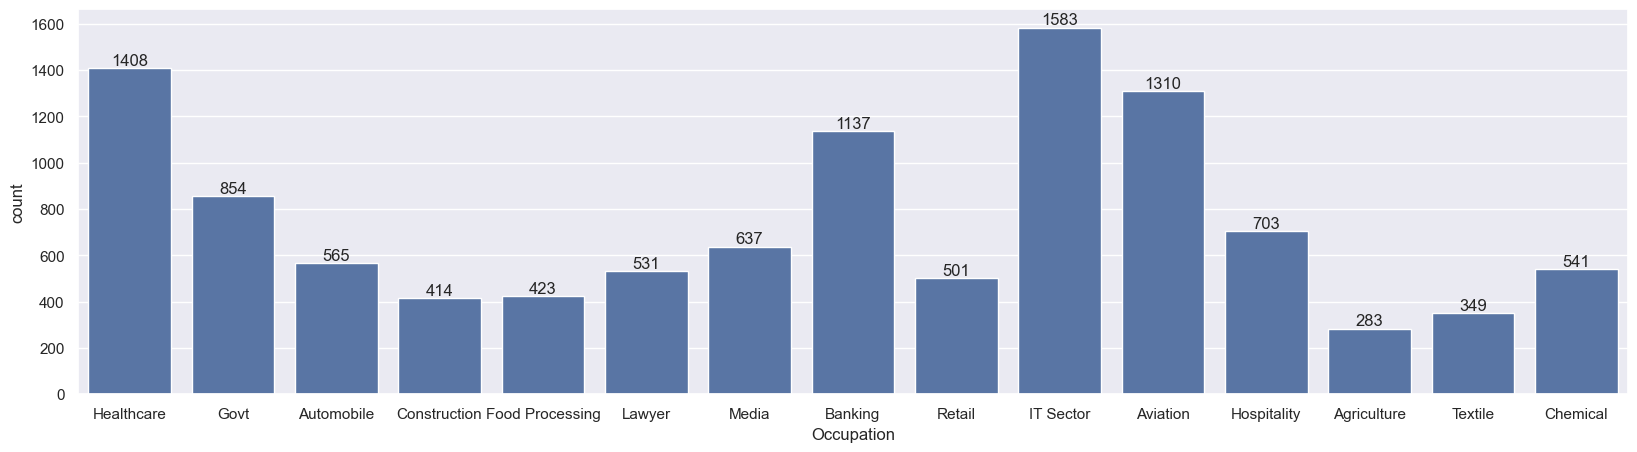

In [25]:
# Occupation
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data=dataframe1,x='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

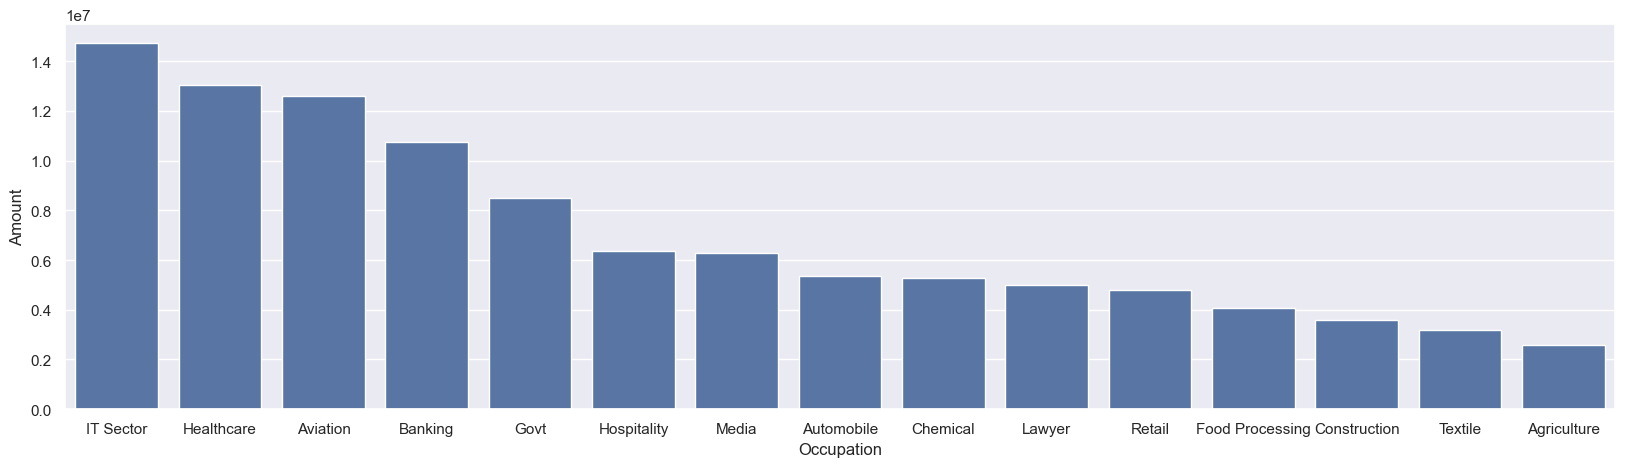

In [26]:
sales_state = dataframe1.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='Occupation',y='Amount')

In [27]:
# most of the buyers are working in IT sector, healthcare, and aviation

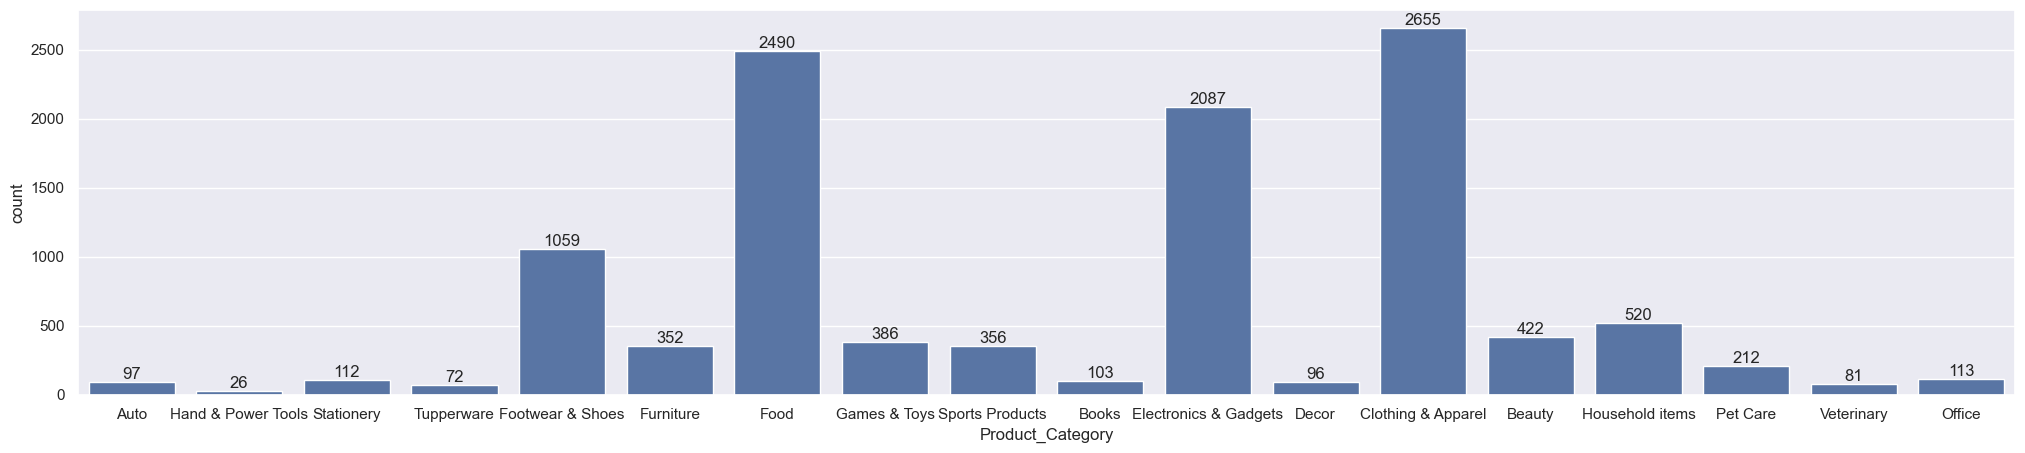

In [28]:
# Product category

sns.set(rc={'figure.figsize':(25,5)})

ax = sns.countplot(data=dataframe1,x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

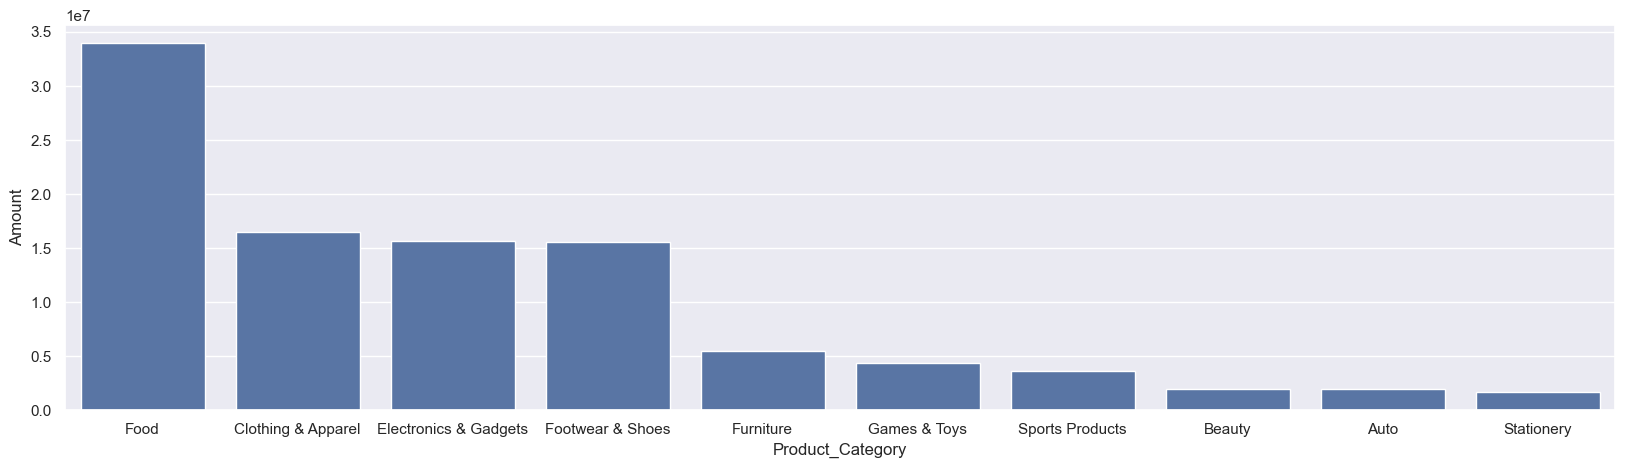

In [29]:
sales_state = dataframe1.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by = 'Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='Product_Category',y='Amount')

In [30]:
# from the above graphs, we can see that most of the sold product are from food, clothing, and electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

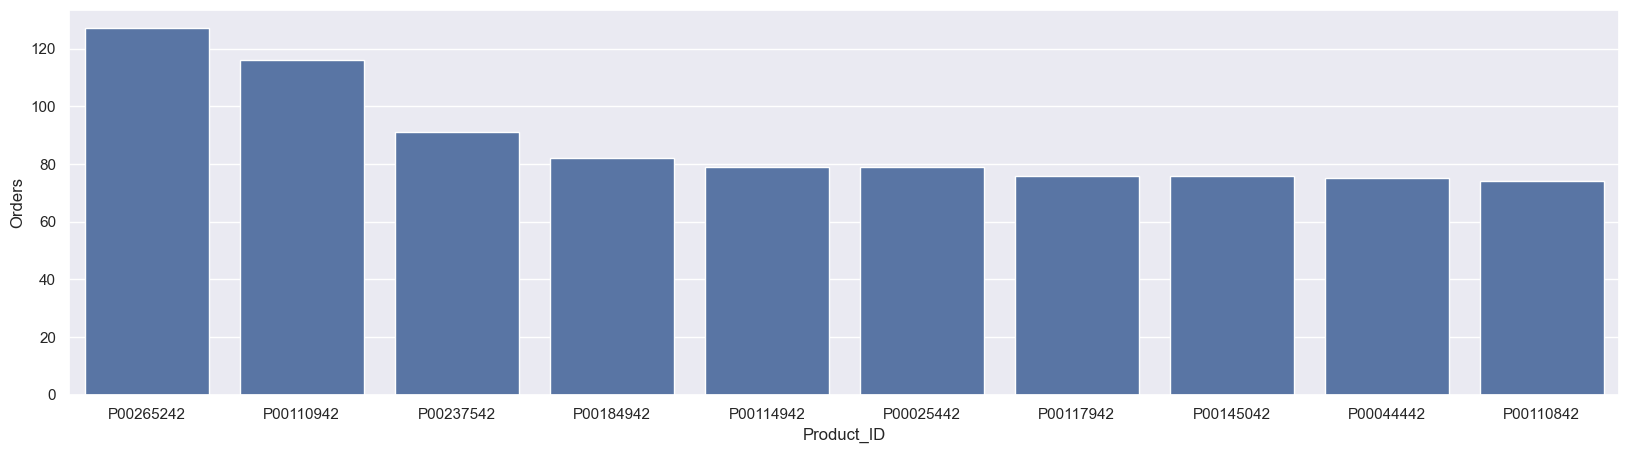

In [31]:
sales_state = dataframe1.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending = False).head(10)

sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='Product_ID',y='Orders')

In [32]:
# Conclusion

# Married women from age 26-35 years are from MH,UP, KL are working in IT,Healthcare, Aviation, are buying products from Food,Clothing, and Electronics category